# Environmental Pollution Analysis

Air Quality Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

# * Data Collection

# Reading Dataset to Python Environment

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [156]:
df=pd.read_excel('AirQualityUCI.xlsx')

In [136]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [157]:
del df['Unnamed: 15'] 
del df['Unnamed: 16'] 

# Basic Details of the Dataset

In [158]:
df.shape

(9357, 15)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [160]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [161]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [162]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

# * Data Preprocessing

# 1.Missing Value Handling

In [163]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [187]:
# missing values are denoted as -200 in the dataset
for i in df.columns:
    print(i,":",df[i].where(df[i]==-200).count())

Date : 0
Time : 0
CO(GT) : 1683
PT08.S1(CO) : 366
NMHC(GT) : 8443
C6H6(GT) : 366
PT08.S2(NMHC) : 366
NOx(GT) : 1639
PT08.S3(NOx) : 366
NO2(GT) : 1642
PT08.S4(NO2) : 366
PT08.S5(O3) : 366
T : 366
RH : 366
AH : 366


In [188]:
df1=df.select_dtypes(exclude=['datetime64','object'])

In [189]:
df1

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [190]:
# Replace the missing value(-200) as nan
for i in df1.columns:
    df1[i]=np.where(df1[i]==-200,np.nan,df1[i])
df1.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [191]:
# Drop the feature NMHC(GT) because 8443 missing values are there

df1=df1.drop(['NMHC(GT)'], axis=1)

In [192]:
df1.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [194]:
# Replace the missing value(-200) as nan
for i in df1.columns:
    df1[i]=np.where(df1[i]==-200,np.nan,df1[i])
    df1.isnull().sum()

In [195]:
df1

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


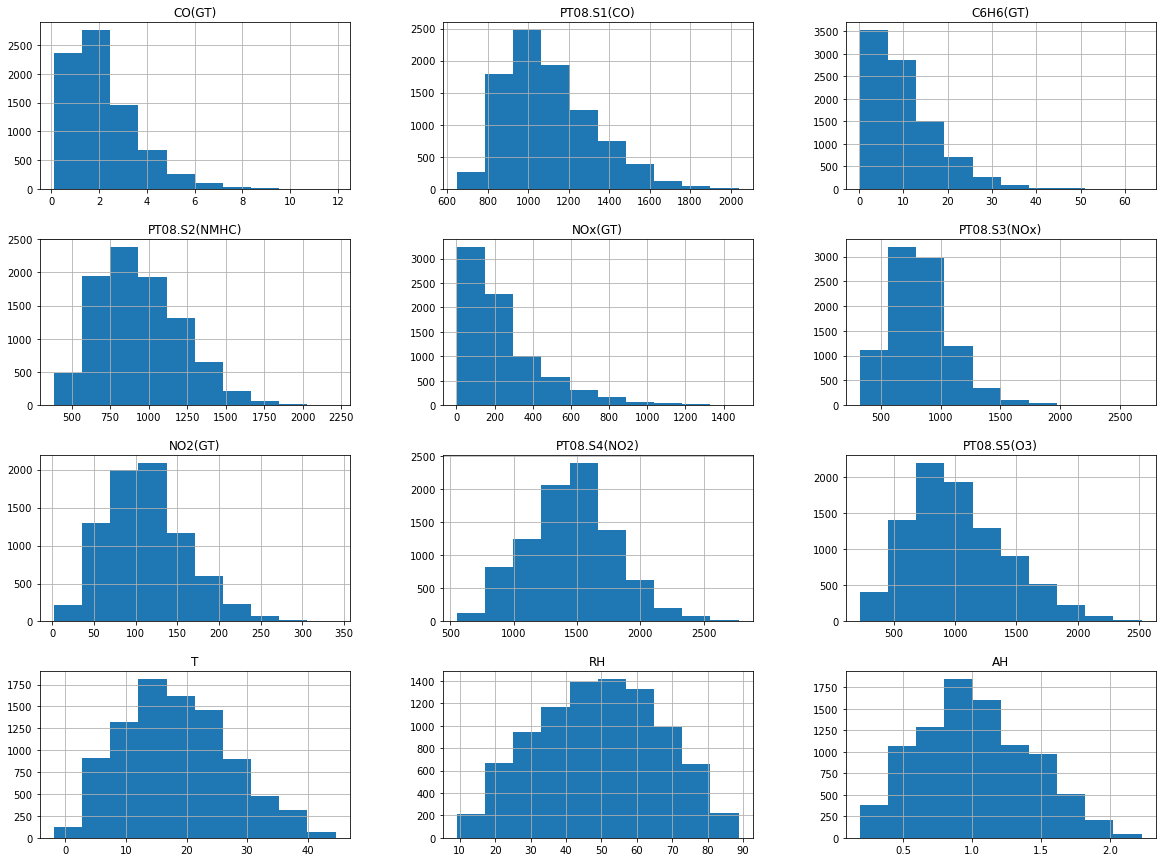

In [197]:
freqgraph=df1.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [198]:
df1.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [199]:
df1.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [200]:
# replace the missing values of skewed data with median 
for i in ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)','NO2(GT)', 'PT08.S5(O3)']:
    df1[i]=df1[i].fillna(df1[i].median())

In [201]:
# replace the missing values with mean
for i in ['PT08.S4(NO2)','T','RH','AH']:
    df1[i]=df1[i].fillna(df1[i].mean())

In [108]:
df1

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,993.0,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1146.00,92.0,993.0,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,993.0,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,993.0,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1146.00,116.0,993.0,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.0,1314.25,13.529605,1101.25,471.7,538.50,171.0,993.0,1577.00,21.850,29.250000,0.756824
9353,2.4,1162.50,11.355157,1027.00,353.3,603.75,171.0,993.0,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,12.374538,1062.50,293.0,603.25,171.0,993.0,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,993.0,769.75,28.325,13.550000,0.513866


In [203]:
df1.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# 3.Outlier detection and handling

<AxesSubplot:xlabel='CO(GT)'>

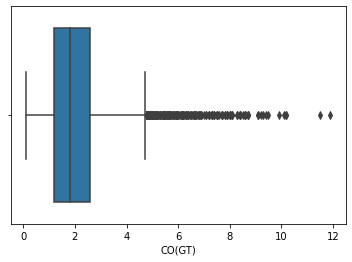

In [206]:
sns.boxplot(df1['CO(GT)'])


In [207]:
q1=np.percentile(df1['CO(GT)'],25,interpolation='midpoint')
q2=np.percentile(df1['CO(GT)'],50,interpolation='midpoint')
q3=np.percentile(df1['CO(GT)'],75,interpolation='midpoint')

In [208]:
print(q1)
print(q2)
print(q3)

1.2
1.8
2.6


In [209]:
df1['CO(GT)'].median()

1.8

In [210]:
IQR=q3-q1

In [211]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

In [212]:
print(low_lim)
print(up_lim)

-0.9000000000000001
4.7


In [213]:
outlier=[]
for x in df1['CO(GT)']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
len(outlier)

454

In [214]:
outlier

[4.8,
 6.9,
 6.1,
 6.6,
 5.4,
 5.9,
 5.5,
 8.1,
 5.8,
 6.1,
 8.0,
 6.5,
 5.3,
 5.1,
 6.6,
 5.0,
 7.6,
 6.7,
 5.7,
 6.6,
 5.1,
 5.1,
 4.8,
 6.2,
 5.2,
 6.2,
 5.5,
 4.9,
 5.0,
 5.5,
 6.2,
 5.1,
 6.3,
 5.0,
 5.0,
 5.2,
 5.9,
 7.3,
 6.1,
 5.7,
 5.2,
 6.4,
 6.0,
 5.6,
 5.0,
 5.2,
 4.8,
 5.6,
 5.5,
 4.8,
 5.4,
 5.3,
 4.9,
 7.2,
 4.9,
 5.4,
 6.5,
 5.7,
 5.4,
 5.5,
 4.8,
 6.3,
 5.0,
 5.9,
 5.1,
 5.1,
 6.5,
 6.2,
 5.4,
 4.8,
 4.8,
 4.8,
 5.8,
 5.0,
 6.4,
 4.9,
 4.8,
 4.8,
 5.1,
 4.8,
 5.0,
 4.8,
 5.0,
 4.8,
 5.6,
 5.7,
 4.9,
 4.9,
 4.9,
 5.1,
 5.3,
 5.1,
 5.0,
 4.9,
 4.8,
 4.9,
 5.2,
 4.9,
 5.8,
 5.4,
 6.2,
 6.1,
 6.7,
 5.7,
 5.0,
 5.6,
 6.5,
 5.6,
 7.3,
 5.3,
 5.0,
 5.6,
 5.4,
 5.5,
 5.5,
 5.0,
 5.1,
 5.2,
 4.9,
 5.5,
 5.6,
 5.5,
 4.8,
 6.7,
 7.5,
 5.2,
 5.6,
 6.3,
 6.5,
 6.3,
 5.7,
 5.6,
 5.4,
 5.3,
 6.7,
 7.0,
 5.7,
 5.1,
 4.8,
 4.8,
 8.0,
 7.7,
 6.8,
 6.0,
 6.0,
 5.0,
 5.5,
 5.4,
 8.4,
 6.8,
 5.2,
 5.0,
 7.9,
 8.4,
 8.0,
 6.4,
 5.3,
 5.8,
 8.4,
 9.5,
 6.2,
 5.0,
 4.9,
 5.0,
 6.5,
 5.9,
 5.1

In [215]:
ind1=df1['CO(GT)']>up_lim
df1.loc[ind1].index

Int64Index([  24,   25,   26,   50,   53,   98,  110,  111,  112,  120,
            ...
            9073, 9074, 9097, 9098, 9099, 9120, 9121, 9122, 9206, 9350],
           dtype='int64', length=454)

<AxesSubplot:xlabel='CO(GT)'>

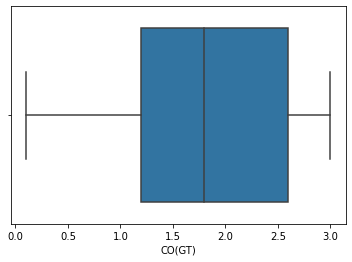

In [216]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['CO(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df1['CO(GT)'] = np.where(df1['CO(GT)']>ni_percentile, ni_percentile, df1['CO(GT)'])

sns.boxplot(df1['CO(GT)'])


outliers removed

<AxesSubplot:xlabel='PT08.S1(CO)'>

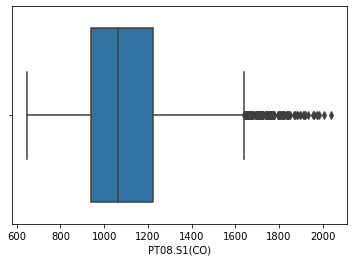

In [217]:
sns.boxplot(df1['PT08.S1(CO)'])

In [218]:
q1=np.percentile(df1['PT08.S1(CO)'],25,interpolation="midpoint")
q3=np.percentile(df1['PT08.S1(CO)'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['PT08.S1(CO)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

145

<AxesSubplot:xlabel='PT08.S1(CO)'>

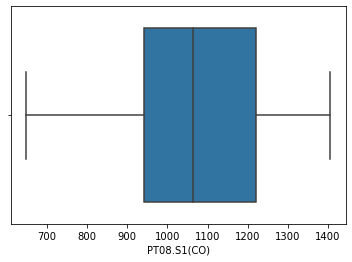

In [219]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['PT08.S1(CO)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df1['PT08.S1(CO)'] = np.where(df1['PT08.S1(CO)']>ni_percentile, ni_percentile,df1['PT08.S1(CO)'])

sns.boxplot(df1['PT08.S1(CO)'])

outliers removed

<AxesSubplot:xlabel='C6H6(GT)'>

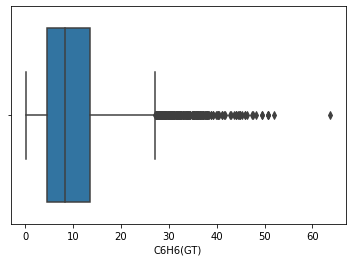

In [220]:
sns.boxplot(df1['C6H6(GT)'])

In [221]:
q1=np.percentile(df1['C6H6(GT)'],25,interpolation="midpoint")
q3=np.percentile(df1['C6H6(GT)'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['C6H6(GT)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

281

<AxesSubplot:xlabel='C6H6(GT)'>

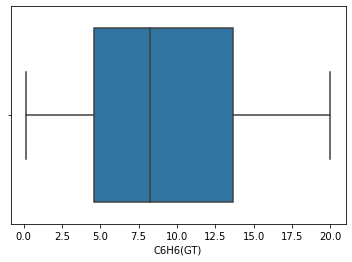

In [222]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['C6H6(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df1['C6H6(GT)'] = np.where(df1['C6H6(GT)']>ni_percentile, ni_percentile,df1['C6H6(GT)'])

sns.boxplot(df1['C6H6(GT)'])

outliers removed

<AxesSubplot:xlabel='PT08.S2(NMHC)'>

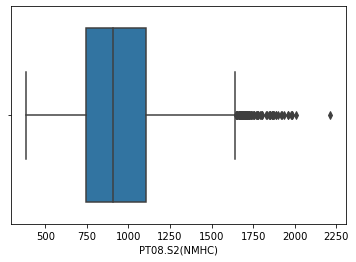

In [223]:
sns.boxplot(df1['PT08.S2(NMHC)'])

In [224]:
q1=np.percentile(df1['PT08.S2(NMHC)'],25,interpolation="midpoint")
q3=np.percentile(df1['PT08.S2(NMHC)'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['PT08.S2(NMHC)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

92

<AxesSubplot:xlabel='PT08.S2(NMHC)'>

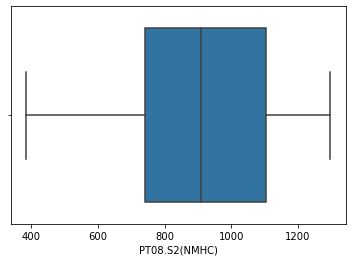

In [225]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['PT08.S2(NMHC)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df1['PT08.S2(NMHC)'] = np.where(df1['PT08.S2(NMHC)']>ni_percentile, ni_percentile,df1['PT08.S2(NMHC)'])

sns.boxplot(df1['PT08.S2(NMHC)'])

<AxesSubplot:xlabel='NOx(GT)'>

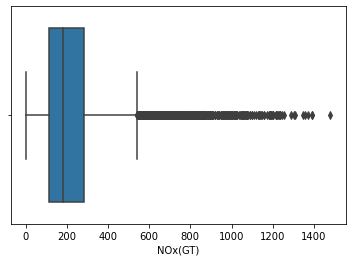

In [226]:
sns.boxplot(df1['NOx(GT)'])

In [227]:
q1=np.percentile(df1['NOx(GT)'],25,interpolation="midpoint")
q3=np.percentile(df1['NOx(GT)'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['NOx(GT)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

778

<AxesSubplot:xlabel='NOx(GT)'>

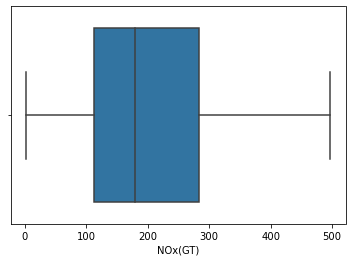

In [228]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['NOx(GT)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df1['NOx(GT)'] = np.where(df1['NOx(GT)']>ni_percentile, ni_percentile,df1['NOx(GT)'])

sns.boxplot(df1['NOx(GT)'])

outliers removed

<AxesSubplot:xlabel='PT08.S3(NOx)'>

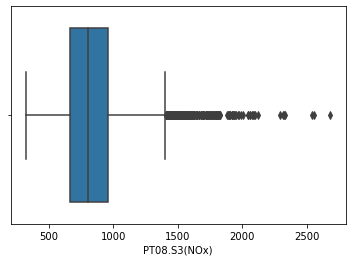

In [229]:
sns.boxplot(df1['PT08.S3(NOx)'])

In [230]:
q1=np.percentile(df1['PT08.S3(NOx)'],25,interpolation="midpoint")
q3=np.percentile(df1['PT08.S3(NOx)'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['PT08.S3(NOx)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

277

<AxesSubplot:xlabel='PT08.S3(NOx)'>

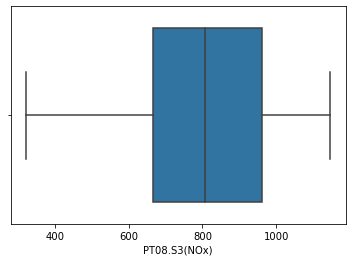

In [231]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['PT08.S3(NOx)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df1['PT08.S3(NOx)'] = np.where(df1['PT08.S3(NOx)']>ni_percentile, ni_percentile,df1['PT08.S3(NOx)'])

sns.boxplot(df1['PT08.S3(NOx)'])

<AxesSubplot:xlabel='NO2(GT)'>

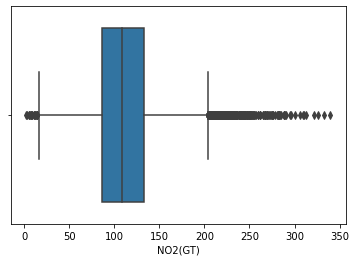

In [233]:
sns.boxplot(df1['NO2(GT)'])

In [234]:
q1=np.percentile(df1['NO2(GT)'],25,interpolation="midpoint")
q3=np.percentile(df1['NO2(GT)'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['NO2(GT)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

379

<AxesSubplot:xlabel='NO2(GT)'>

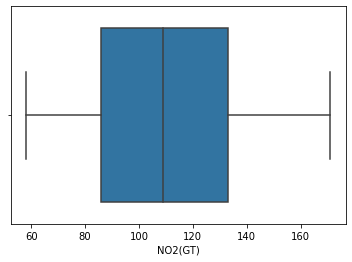

In [235]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['NO2(GT)'], 90))
tenth_percentile = int(np.percentile(df1['NO2(GT)'], 10))

# the values above 90th percentile are replaced with 90th percentile value
df1['NO2(GT)']= np.where(df1['NO2(GT)']>ni_percentile, ni_percentile,df1['NO2(GT)'])
df1['NO2(GT)']= np.where(df1['NO2(GT)']<tenth_percentile, tenth_percentile,df1['NO2(GT)'])

sns.boxplot(df1['NO2(GT)'])

outliers removed

<AxesSubplot:xlabel='PT08.S4(NO2)'>

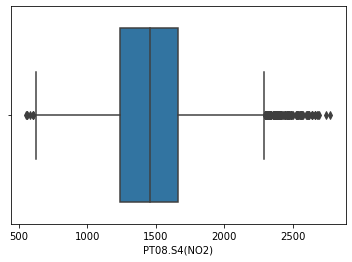

In [236]:
sns.boxplot(df1['PT08.S4(NO2)'])

In [237]:
q1=np.percentile(df1['PT08.S4(NO2)'],25,interpolation="midpoint")
q3=np.percentile(df1['PT08.S4(NO2)'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['PT08.S4(NO2)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

131

<AxesSubplot:xlabel='PT08.S4(NO2)'>

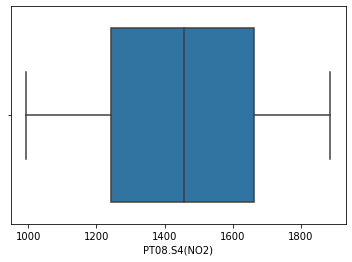

In [238]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['PT08.S4(NO2)'], 90))
tenth_percentile = int(np.percentile(df1['PT08.S4(NO2)'], 10))

# the values above 90th percentile are replaced with 90th percentile value
df1['PT08.S4(NO2)']= np.where(df1['PT08.S4(NO2)']>ni_percentile, ni_percentile,df1['PT08.S4(NO2)'])
df1['PT08.S4(NO2)']= np.where(df1['PT08.S4(NO2)']<tenth_percentile, tenth_percentile,df1['PT08.S4(NO2)'])

sns.boxplot(df1['PT08.S4(NO2)'])

outliers removed

<AxesSubplot:xlabel='PT08.S5(O3)'>

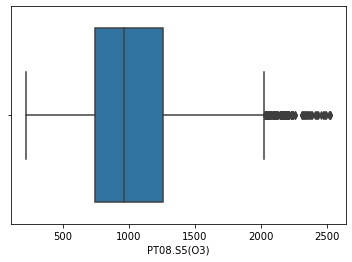

In [239]:
sns.boxplot(df1['PT08.S5(O3)']) 

In [240]:
q1=np.percentile(df1['PT08.S5(O3)'],25,interpolation="midpoint")
q3=np.percentile(df1['PT08.S5(O3)'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['PT08.S5(O3)']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

130

<AxesSubplot:xlabel='PT08.S5(O3)'>

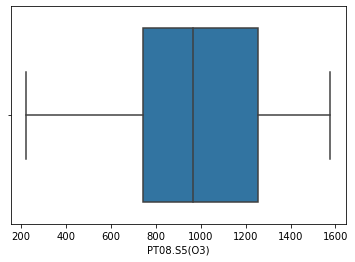

In [241]:
# Computing 90th percentiles and replacing the outliers
ni_percentile = int(np.percentile(df1['PT08.S5(O3)'], 90))

# the values above 90th percentile are replaced with 90th percentile value
df1['PT08.S5(O3)']= np.where(df1['PT08.S5(O3)']>ni_percentile, ni_percentile,df1['PT08.S5(O3)'])

sns.boxplot(df1['PT08.S5(O3)'])

outliers removed

<AxesSubplot:xlabel='T'>

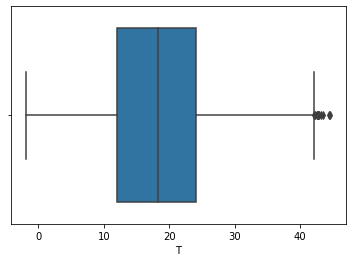

In [242]:
sns.boxplot(df1['T']) 

In [243]:
q1=np.percentile(df1['T'],25,interpolation="midpoint")
q3=np.percentile(df1['T'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['T']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier) 

12

<AxesSubplot:xlabel='T'>

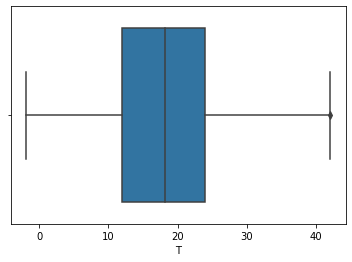

In [244]:
# remove the outliers 
df1 = df1[(df1['T'] > low_lim) & (df1['T'] < up_lim)]
sns.boxplot(df1['T']) 

outliers removed

<AxesSubplot:xlabel='RH'>

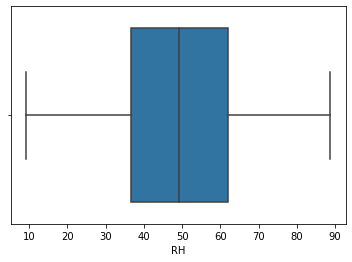

In [245]:
sns.boxplot(df1['RH']) 

no outliers in RH

<AxesSubplot:xlabel='AH'>

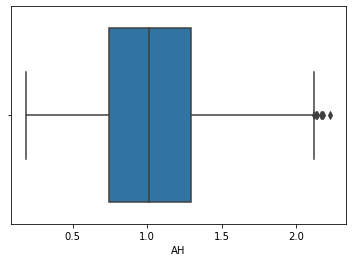

In [246]:
sns.boxplot(df1['AH']) 

In [247]:
q1=np.percentile(df1['AH'],25,interpolation="midpoint")
q3=np.percentile(df1['AH'],75,interpolation="midpoint")
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

outlier = []
for x in df1['AH']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)
len(outlier)

7

<AxesSubplot:xlabel='AH'>

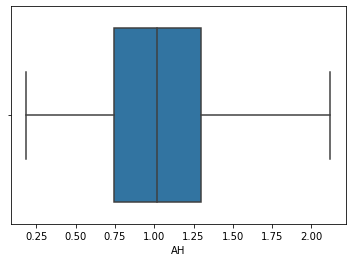

In [248]:
# remove the outliers
df1 = df1[(df1['AH'] > low_lim) & (df1['AH'] < up_lim)]
sns.boxplot(df1['AH']) 

outliers removed

# 3)Standardization

In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1_scaler=scaler.fit_transform(df1)
df1.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,993.0,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1146.00,92.0,993.0,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,993.0,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,993.0,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1146.00,116.0,993.0,1110.00,11.15,59.575001,0.788794


# * Exploratory Data Analysis

In [95]:
df1.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.0,9338.000000,9338.000000,9338.000000,9338.000000
mean,1.846166,1085.305285,9.398463,922.448285,214.574084,813.356536,110.636303,993.0,997.658385,18.255885,49.280734,1.023374
std,0.811440,185.181467,5.815711,230.418994,138.568920,202.139463,34.423505,0.0,343.475778,8.619249,16.937178,0.394997
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,58.000000,993.0,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,4.581919,742.000000,112.000000,665.062500,85.925000,993.0,741.250000,12.025000,36.599999,0.745831
50%,1.800000,1063.000000,8.239851,909.000000,179.800000,805.500000,109.000000,993.0,963.250000,17.750000,49.550000,0.995395
75%,2.600000,1221.437500,13.636091,1104.750000,284.800000,960.750000,133.000000,993.0,1255.625000,24.000000,61.875001,1.295626
max,3.000000,1406.000000,20.000000,1298.000000,497.000000,1146.000000,171.000000,993.0,1577.000000,42.049999,88.725000,2.119450


# 1) Univariate Analysis

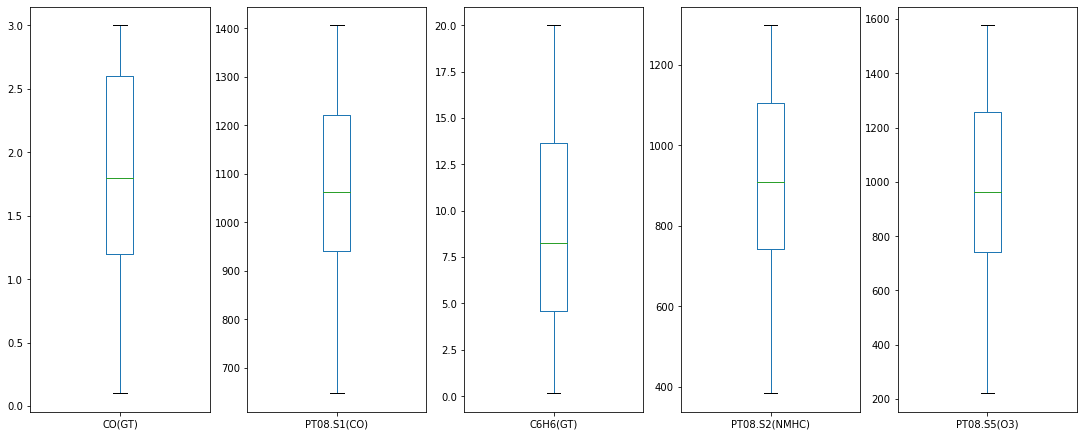

In [249]:
plt.subplot(151)
df1['CO(GT)'].plot.box(figsize=(15,6))
plt.tight_layout(pad=0.5)

plt.subplot(152)
df1['PT08.S1(CO)'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(153)
df1['C6H6(GT)'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(154)
df1['PT08.S2(NMHC)'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(155)
df1['PT08.S5(O3)'].plot.box()
plt.tight_layout(pad=0.5)

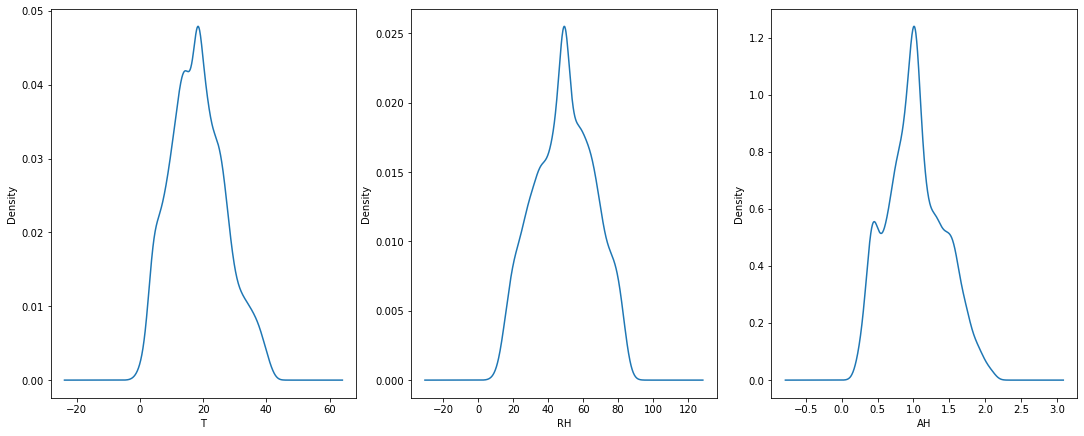

In [250]:
# Perform Univariate Analysis using Density plot
plt.subplot(131)
df1['T'].plot.kde(figsize=(15,6))
plt.xlabel("T")
plt.tight_layout(pad=0.5)

plt.subplot(132)
df1['RH'].plot.kde()
plt.xlabel("RH")
plt.tight_layout(pad=0.5)

plt.subplot(133)
df1['AH'].plot.kde()
plt.xlabel("AH")
plt.tight_layout(pad=0.5)

# 2) Bivariate Analysis

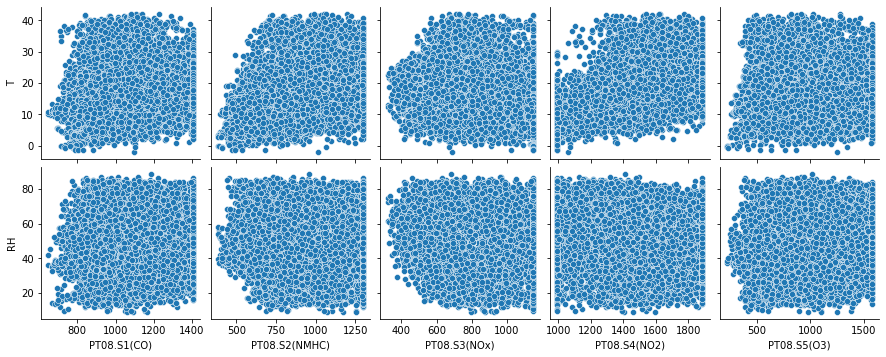

In [251]:
sns.pairplot( df1,
    x_vars=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'],
    y_vars=["T", "RH"]
)

# * Modelling

In [252]:
# Define independent and dependent variables
x=df1.drop(['RH'],axis=1)
y=pd.DataFrame(df1['RH'])
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [253]:
x_train.shape

(6536, 11)

In [254]:
x_test.shape

(2802, 11)

In [255]:
y_train.shape

(6536, 1)

In [256]:
y_test.shape

(2802, 1)

our objective is to predict the 'RH' relative humidity from the given features, we go for Regression.

# a) RandomForest Regressor Model

In [258]:
# Build the Model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

# Evaluation of the model
from sklearn.metrics import  mean_squared_error, r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test,y_pred))

MSE is: 0.3627478562357246
R squared value is: 0.9987455638456039


# b) DecisionTree Regressor Model

In [259]:
# Build the Model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

# Evaluation of the model
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test,y_pred))

MSE is: 1.4645535234939073
R squared value is: 0.9949353556241965


# c) LinearRegression Model

In [260]:
# Build the Model
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

# Evaluation of the model
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test,y_pred))

MSE is: 35.733417462764336
R squared value is: 0.8764285163513318


From the above three model comparison, the model with least MSE value is RandomForest Regressor Model.Hence, we choose RandomForest Regressor Model for fine tuning.

# * Model Fine Tuning

In [261]:
# RandomRegressor Model
from sklearn.ensemble import RandomForestRegressor
print('Parameters currently in use:\n')
print(rf.get_params())

# Fine tuning the hyper parameters of the model
rf1=RandomForestRegressor(n_estimators = 1000, oob_score = True,n_jobs = 1,random_state =1)  
rf1.fit(x_train,y_train)
y_pred=rf1.predict(x_test)

print('\n MSE is:',mean_squared_error(y_test,y_pred))
print('R squared value is:',r2_score(y_test,y_pred))

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

 MSE is: 0.3512051676897531
R squared value is: 0.9987854801830325


After fine tuning the hyperparameter, the MSE value has reduced from 0.364 to 0.351.

RandomForestRegressor Model is good for 'RH'